In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle as pk
from scipy import signal
from scipy.fft import fft
from scipy.io import wavfile
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense

In [2]:
# Load sample
SampleName = "sample7.wav" # Audio File
SampleRate, Audiodata = wavfile.read(SampleName)

Audiodata = Audiodata[0:141120] # Want to exactly match the length of the WAVs used to train.

(129, 629)
[[0.00000000e+00 1.55585244e-01 1.81718200e-01 ... 8.99606268e-04
  8.02877173e-02 2.02669809e-03]
 [0.00000000e+00 8.00703144e+00 2.09357796e+01 ... 4.88406159e-02
  8.58555734e-02 6.00516945e-02]
 [0.00000000e+00 2.85619259e+00 1.27686515e-01 ... 8.97714272e-02
  1.25067025e-01 9.98934805e-02]
 ...
 [0.00000000e+00 2.53151283e-02 1.42200617e-02 ... 1.06383217e-02
  9.96040367e-03 2.35173688e-03]
 [0.00000000e+00 3.11196735e-03 5.33555867e-03 ... 2.73474921e-02
  5.46379723e-02 6.24794513e-04]
 [0.00000000e+00 2.56702118e-02 3.49003181e-04 ... 5.64306974e-03
  1.42797595e-02 1.19449082e-03]]
(1, 222261)


array([[0.0000000e+00, 1.5558524e-01, 1.8171820e-01, ..., 7.1500000e+02,
        7.1500000e+02, 7.1500000e+02]], dtype=float32)

(129, 629)
[[0.00000000e+00 1.55585244e-01 1.81718200e-01 ... 8.99606268e-04
  8.02877173e-02 2.02669809e-03]
 [0.00000000e+00 8.00703144e+00 2.09357796e+01 ... 4.88406159e-02
  8.58555734e-02 6.00516945e-02]
 [0.00000000e+00 2.85619259e+00 1.27686515e-01 ... 8.97714272e-02
  1.25067025e-01 9.98934805e-02]
 ...
 [0.00000000e+00 2.53151283e-02 1.42200617e-02 ... 1.06383217e-02
  9.96040367e-03 2.35173688e-03]
 [0.00000000e+00 3.11196735e-03 5.33555867e-03 ... 2.73474921e-02
  5.46379723e-02 6.24794513e-04]
 [0.00000000e+00 2.56702118e-02 3.49003181e-04 ... 5.64306974e-03
  1.42797595e-02 1.19449082e-03]]
-973
(1, 222261)


array([[0.0000000e+00, 1.5558524e-01, 1.8171820e-01, ..., 7.1500000e+02,
        7.1500000e+02, 7.1500000e+02]], dtype=float32)

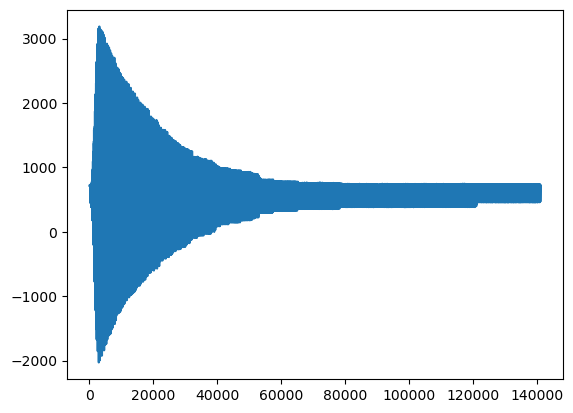

In [12]:
# Run spectral analysis
frequencies, times, spectrogram = signal.spectrogram(Audiodata, SampleRate)
del frequencies
del times
print(np.shape(spectrogram))
print(spectrogram)

SampleFeatures = np.append(spectrogram.flatten(), Audiodata).reshape(1,-1)

plt.plot(Audiodata)

print(np.shape(SampleFeatures))
SampleFeatures

In [3]:
# Insert scaler here.


# Load PCA model.
os.chdir('..')
os.chdir('./models/')
pca = pk.load(open('pca7.pkl','rb'))
print("Loaded PCA from disk")
ReducedFeatures = pca.transform(SampleFeatures)
del SampleFeatures
del pca
del spectrogram

print(np.shape(ReducedFeatures))
ReducedFeatures

Loaded PCA from disk
(1, 200)


/home/jacob/anaconda3/envs/tf-gpu/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-1.87966661e+05, -1.60550317e+05, -1.00268160e+04,
        -8.52193614e+04, -3.38568730e+04,  1.44953785e+04,
         7.23717197e+03,  3.96211942e+02,  1.02899310e+04,
         2.12462329e+04, -3.87659366e+04, -1.63944371e+04,
        -3.32330634e+04, -1.11389671e+04, -4.95465803e+04,
        -1.15522825e+04,  4.30491302e+04,  2.14096450e+04,
        -1.86634735e+04,  2.77752980e+04,  2.85483961e+04,
        -2.94110242e+04,  1.12822590e+04, -7.71017037e+02,
        -2.23653671e+04,  9.31654542e+02, -2.18587908e+04,
         3.02056069e+04, -2.63575878e+04,  2.47450586e+04,
         2.33220860e+04,  1.65341127e+04,  2.37404479e+04,
        -7.47432557e+03, -4.92494815e+04,  1.01416297e+04,
         2.29770815e+03, -1.25598255e+04,  2.55310184e+04,
         1.26169121e+04, -1.89891951e+04, -6.21428638e+03,
         6.67281733e+03, -9.02545357e+03, -2.44280456e+04,
        -1.23954884e+04, -1.91225859e+03,  3.60512865e+03,
         1.65181543e+04, -1.92278342e+04, -1.76336104e+0

In [4]:
# Load NN model.
json_file = open('model7.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model7 = model_from_json(loaded_model_json)
# load weights into new model
model7.load_weights("model7.h5")
print("Loaded model from disk")
 
#model7.compile(loss='mean_square_error', optimizer='adam', metrics=['mean_square_error'])

predictions = model7.predict(ReducedFeatures)

print('Predicted registers: ')
predictions

2023-02-17 18:29:46.660592: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-17 18:29:46.722229: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-17 18:29:46.722379: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-17 18:29:46.722433: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1990] Ignoring visible gpu device (device: 0, name: Radeon RX 570 Series, pci bus id: 0000:09:00.0) with AMDGPU version : gfx803. The supported AMDGPU versions are gfx1030, gfx900, gfx906, gfx908, gfx90a.
2023-02-17 18:29:

Loaded model from disk
1/1 [==============================] - 0s 84ms/step
Predicted registers: 


2023-02-17 18:29:46.970916: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]], dtype=float32)